<font size="+3" color="lightgrey"> Campus Recruitment analysis

<img src="https://www.processmaker.com/wp-content/uploads/2020/03/20689.jpg" title="Campus"/>

## Importing Python libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

## Getting the data

In [3]:
data = pd.read_csv("data/Placement_Data_Full_Class.csv")
data.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Description of dataset

### Factors influencing Employability

The database that we are going to use in this projet consists of placement data of students in a campus.

It includes secondary and higher secondary school percentage and specialisation. It also includes degree specialisation, type and Work experience and salary offers to the employed students.

The database is provided by Jain University Bangalore and it can be found <a href="https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement" title="Campus Recruitment">here</a> 

The data is made up of 215 students with 18 variables.

Description of the variables:

- **sl.no**: Serial Number
- **gender**: Gender- Male=‘M’,Female=‘F’
- **ssc_p**: Secondary Education percentage- 10th Grade
- **ssc_b**: Board of Education- Central/ Others
- **hsc_p**: Higher Secondary Education percentage- 12th Grade
- **hsc_b**: Board of Education- Central/ Others
- **hsc_s**: Specialisation in Higher Secondary Education
- **degree_p**: Degree Percentage
- **degree_t**: Under Graduation(Degree type)- Field of degree education
- **workex**: Work Experience
- **etest_p**: Employability test percentage (conducted by college)
- **specialisation**: Post Graduation(MBA)- Specialisation
- **mba_p**: MBA percentage
- **status**: Status of placement- Placed /Not Placed 
- **salary**: Annuary Salary offered by corporate to candidates (Value = Indian Rupia)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## Purpose of the Analysis

The purpose of the analysis is to find out how a person's "status" ("Placed"/"Not Placed") and "salary" are related to the type of study path performed, the grades obtained during it and previous work experience.

## Data Cleaning
We can notice that "salary" has value too much high, this is due to a unit of indian rupe has not too much value.
Let's trasform the "salary" variables in "salary_k" dividing the actual value by 1000

In [4]:
data["salary"] = round(data["salary"]/1000, 2) 
data.rename(columns={"salary":"salary_k"}, inplace=True)

Let's check the missing values for each column

In [7]:
data.isna().sum() # checking all na values in the data dataframe and summing up for each column
# 67 na values in the "salary_k" column

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary_k          67
dtype: int64

In [9]:
# it seems that all NaN values are related to "Not Placed" values in the "status" column...
data.loc[data["salary_k"].isna(), ["status", "salary_k"]]

,status,salary_k
3,Not Placed,NaN
5,Not Placed,NaN
6,Not Placed,NaN
9,Not Placed,NaN
12,Not Placed,NaN
...,...,...
198,Not Placed,NaN
201,Not Placed,NaN
206,Not Placed,NaN
208,Not Placed,NaN


In [14]:
# let's check if the NaN are all due to the "Not Placed" status by doing a simple test: 
# if the "Not Placed" values are 67 just like the NaN values in the "salary_k" column
# then we could affirm that our hypothesis is consistent
data.loc[data["status"]=="Not Placed", "status"].count()

67

## Data Analysis

In [15]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary_k
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288.655405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93.457452
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940.000000


For the categoricals variables we can see their level and the numerosity percentage of them

In [16]:
for var in data.select_dtypes(include=['object']).columns:
    print(f'{round(data[var].value_counts()/len(data)*100)}\n')

M    65.0
F    35.0
Name: gender, dtype: float64

Central    54.0
Others     46.0
Name: ssc_b, dtype: float64

Others     61.0
Central    39.0
Name: hsc_b, dtype: float64

Commerce    53.0
Science     42.0
Arts         5.0
Name: hsc_s, dtype: float64

Comm&Mgmt    67.0
Sci&Tech     27.0
Others        5.0
Name: degree_t, dtype: float64

No     66.0
Yes    34.0
Name: workex, dtype: float64

Mkt&Fin    56.0
Mkt&HR     44.0
Name: specialisation, dtype: float64

Placed        69.0
Not Placed    31.0
Name: status, dtype: float64



We can procede with a more accurate column analysis. Let's do some plot in order to show better how the Data is distributed and the correlaction beetween the variables

In [17]:
data['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

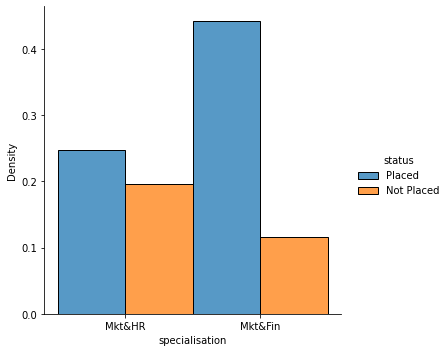

In [18]:
sns.displot(data, x="specialisation", hue= "status", multiple="dodge", stat="density")

We can notice that the most of the students choosen a specialisation in Mkt&Fin have been placed more than who choose Mkt&HR

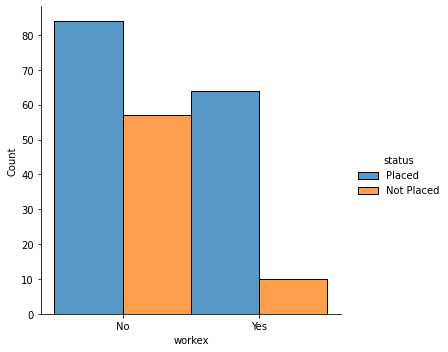

In [19]:
sns.displot(data, x="workex", hue= "status", multiple="dodge")

Work experience could be highly requested and fundamental additional skill.


status | **Workex** | **No Workex**
---:|:---:| ---
**Employed** | 64 | 84
**Not Employed** | 10 | 57


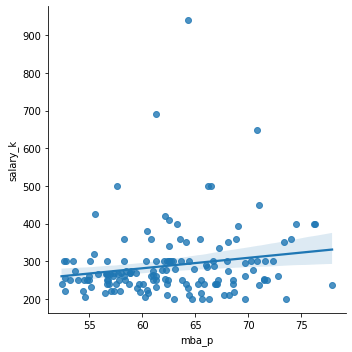

In [20]:
sns.lmplot(data=data, x="mba_p", y="salary_k")

We can notice that there is not to much correlaction beetween "mba_p" and "salary". It seems increasing the "mba_p" salary is not increasing so much. 

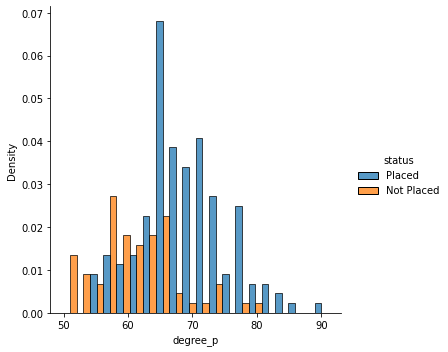

In [22]:
sns.displot(data, x="degree_p", hue='status', bins=20, multiple="dodge", stat="density")

<AxesSubplot:xlabel='specialisation', ylabel='salary_k'>

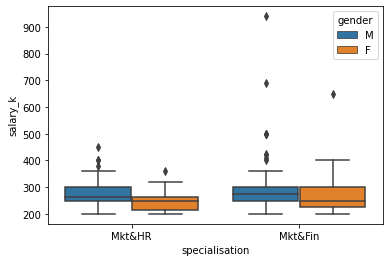

In [23]:
sns.boxplot(x="specialisation", y="salary_k", data=data, hue="gender")

We can notice that in general the salary is higher for the Male student independently from type of specialisation

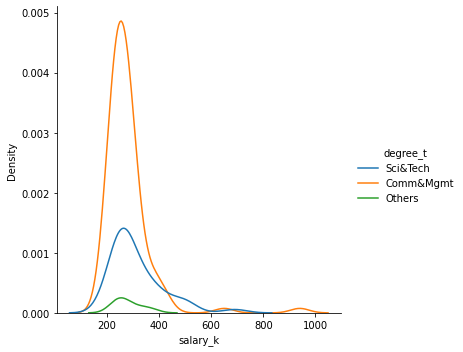

In [25]:
sns.displot(data, x="salary_k", hue="degree_t", kind="kde")

We can notice that for all the student the most frequence salary is more or less 250k. but while who has "Sci&Tech" "degree to" reach max 800k there are any with "Comm&Mgmt" who go over that salary

<AxesSubplot:>

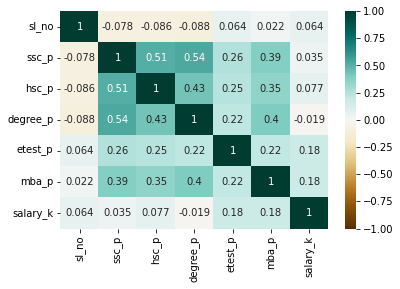

In [26]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

## Conclusion
We can conclude saying that the degree score is important to be placed, the majority of ones who got a score less than 60 has not obtained a job yet.

There is an higher percentage of employed candidates who took score more or less between 60 and 70. 

Always regarding the score in the study field we have notice that a higher grade does not always lead to a higher salary. but the difference in salary could be made by choosing a degree or a specialization over another.

Furthermore have a previous work experience is very important to be placed. 